# Example 8: RVT SRA with simulated profiles

Use RVT with simulated profiles to compute the surface response spectrum and surface spectral ratio.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pysra

%matplotlib inline

In [2]:
# Increased figure sizes
plt.rcParams["figure.dpi"] = 120

## Create a point source theory RVT motion

In [3]:
m = pysra.motion.SourceTheoryRvtMotion(6.0, 30, "wna")
m.calc_fourier_amps()

## Create site profile

This is about the simplest profile that we can create. Linear-elastic soil and rock.

In [4]:
profile = pysra.site.Profile(
    [
        pysra.site.Layer(
            pysra.site.DarendeliSoilType(18.0, plas_index=0, ocr=1, stress_mean=100),
            10,
            400,
        ),
        pysra.site.Layer(
            pysra.site.DarendeliSoilType(18.0, plas_index=0, ocr=1, stress_mean=200),
            10,
            450,
        ),
        pysra.site.Layer(
            pysra.site.DarendeliSoilType(18.0, plas_index=0, ocr=1, stress_mean=400),
            30,
            600,
        ),
        pysra.site.Layer(pysra.site.SoilType("Rock", 24.0, None, 0.01), 0, 1200),
    ]
)

## Create the site response calculator

In [5]:
calc = pysra.propagation.EquivalentLinearCalculator()

## Initialize the variations

In [6]:
var_thickness = pysra.variation.ToroThicknessVariation()
var_velocity = pysra.variation.ToroVelocityVariation.generic_model("USGS C")
var_soiltypes = pysra.variation.SpidVariation(
    -0.5, std_mod_reduc=0.15, std_damping=0.30
)

## Specify the output

In [7]:
freqs = np.logspace(-1, 2, num=500)

outputs = pysra.output.OutputCollection(
    [
        pysra.output.ResponseSpectrumOutput(
            # Frequency
            freqs,
            # Location of the output
            pysra.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pysra.output.ResponseSpectrumRatioOutput(
            # Frequency
            freqs,
            # Location in (denominator),
            pysra.output.OutputLocation("outcrop", index=-1),
            # Location out (numerator)
            pysra.output.OutputLocation("outcrop", index=0),
            # Damping
            0.05,
        ),
        pysra.output.InitialVelProfile(),
    ]
)

## Perform the calculation

In [8]:
count = 20
for p in pysra.variation.iter_varied_profiles(
    profile,
    count,
    var_thickness=var_thickness,
    var_velocity=var_velocity,
    var_soiltypes=var_soiltypes,
):
    # Here we auto-descretize the profile for wave propagation purposes
    calc(m, p.auto_discretize(), p.location("outcrop", index=-1))
    outputs(calc)

## Plot the outputs

Create a few plots of the output.

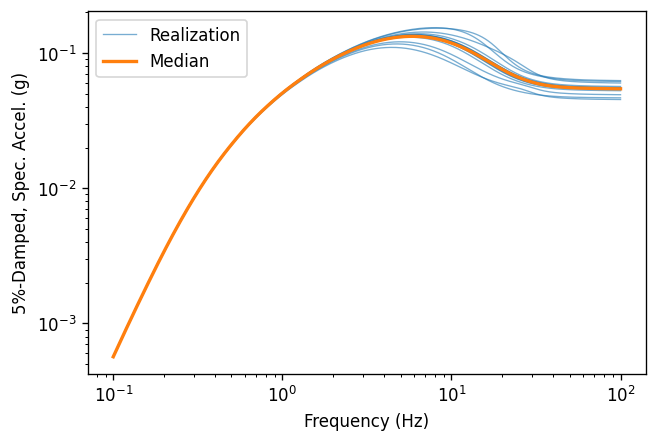

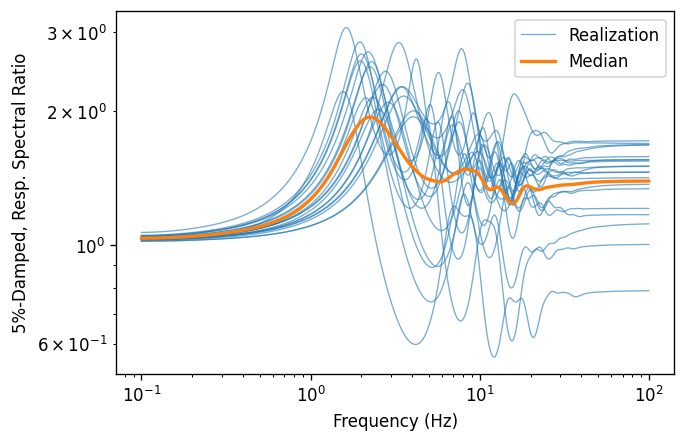

In [9]:
for o in outputs[:-1]:
    ax = o.plot(style="stats")

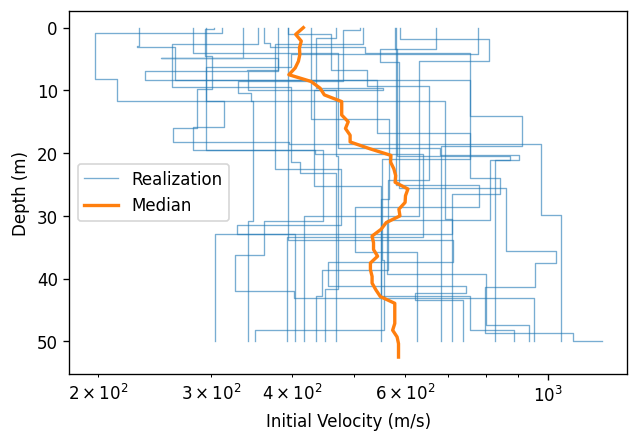

In [10]:
ax = outputs[-1].plot(style="stats")

The statistics of the output can be also retrieved and returned as either a `dict` or `pandas.DataFrame`.

In [11]:
outputs[-1].calc_stats()

{'ref': array([ 0.        ,  1.07142857,  2.14285714,  3.21428571,  4.28571429,
         5.35714286,  6.42857143,  7.5       ,  8.57142857,  9.64285714,
        10.71428571, 11.78571429, 12.85714286, 13.92857143, 15.        ,
        16.07142857, 17.14285714, 18.21428571, 19.28571429, 20.35714286,
        21.42857143, 22.5       , 23.57142857, 24.64285714, 25.71428571,
        26.78571429, 27.85714286, 28.92857143, 30.        , 31.07142857,
        32.14285714, 33.21428571, 34.28571429, 35.35714286, 36.42857143,
        37.5       , 38.57142857, 39.64285714, 40.71428571, 41.78571429,
        42.85714286, 43.92857143, 45.        , 46.07142857, 47.14285714,
        48.21428571, 49.28571429, 50.35714286, 51.42857143, 52.5       ]),
 'median': array([416.88541883, 405.62973938, 413.78586462, 411.08880807,
        411.67382891, 409.59938958, 404.85416384, 395.7903154 ,
        428.41576647, 442.56255252, 449.3833915 , 478.22169652,
        478.22169652, 478.20426504, 489.48429558, 484.67152

In [12]:
outputs[-1].calc_stats(as_dataframe=True)

,median,ln_std
depth,,
0.000000,416.885419,0.314071
1.071429,405.629739,0.348494
2.142857,413.785865,0.371343
3.214286,411.088808,0.374754
4.285714,411.673829,0.349308
5.357143,409.599390,0.325207
6.428571,404.854164,0.336601
7.500000,395.790315,0.361669
8.571429,428.415766,0.351483


## Repeat using a Generic Depth-Dependent Model

The generic `DepthDependToroVelVariation` follows the SPID guidance.

In [13]:
var_velocity_dd = pysra.variation.DepthDependToroVelVariation.generic_model("USGS C")

In [14]:
outputs.reset()
count = 20
for p in pysra.variation.iter_varied_profiles(
    profile,
    count,
    var_thickness=var_thickness,
    var_velocity=var_velocity_dd,
    var_soiltypes=var_soiltypes,
):
    calc(m, p.auto_discretize(), p.location("outcrop", index=-1))
    outputs(calc)

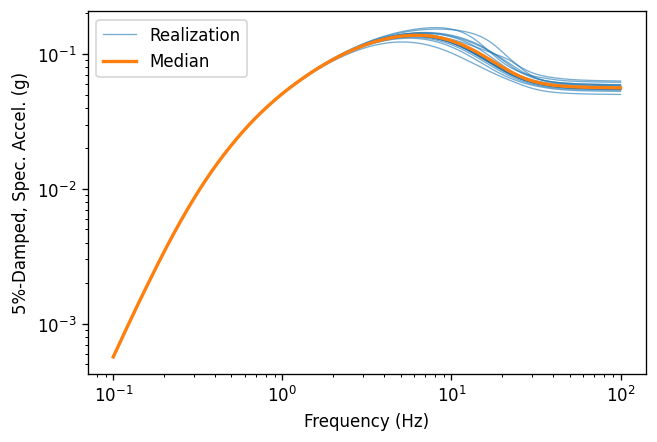

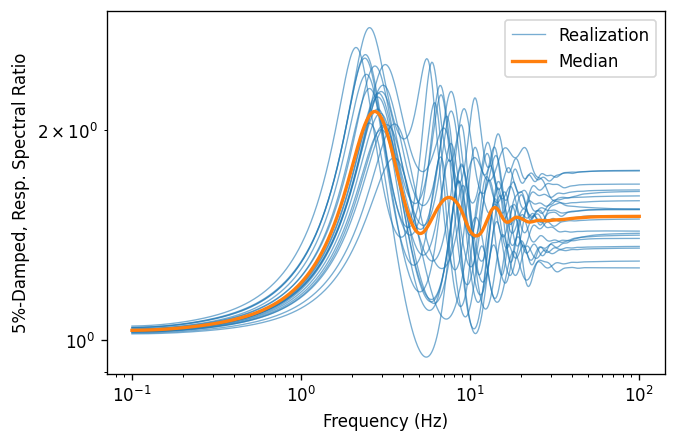

In [15]:
for o in outputs[:-1]:
    ax = o.plot(style="stats")

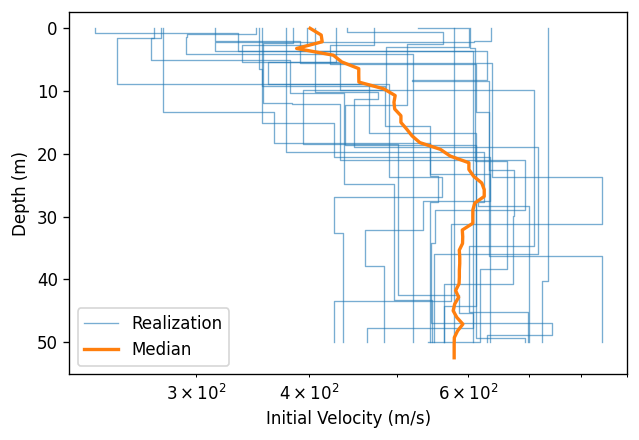

In [16]:
ax = outputs[-1].plot(style="stats")

In [17]:
outputs[-1].calc_stats(as_dataframe=True)

,median,ln_std
depth,,
0.000000,401.112601,0.304614
1.071429,412.604933,0.303784
2.142857,413.667667,0.304383
3.214286,387.575417,0.281191
4.285714,425.534630,0.298781
5.357143,434.744470,0.278101
6.428571,454.037199,0.296230
7.500000,454.037199,0.296230
8.571429,454.183905,0.296589


## Repeat using a Specific Depth-Dependent Model

In [18]:
var_velocity_dd = pysra.variation.DepthDependToroVelVariation.generic_model(
    "USGS C", depth=[0, 10, 20], ln_std=[0.25, 0.15, 0.10]
)

In [19]:
outputs.reset()
count = 20
for p in pysra.variation.iter_varied_profiles(
    profile,
    count,
    var_thickness=var_thickness,
    var_velocity=var_velocity_dd,
    var_soiltypes=var_soiltypes,
):
    calc(m, p.auto_discretize(), p.location("outcrop", index=-1))
    outputs(calc)

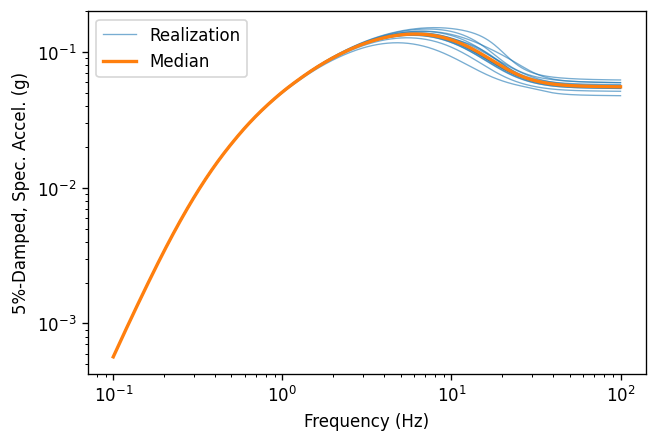

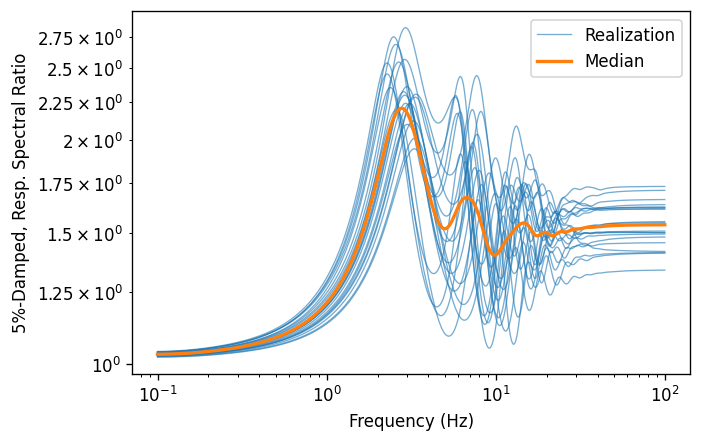

In [20]:
for o in outputs[:-1]:
    ax = o.plot(style="stats")

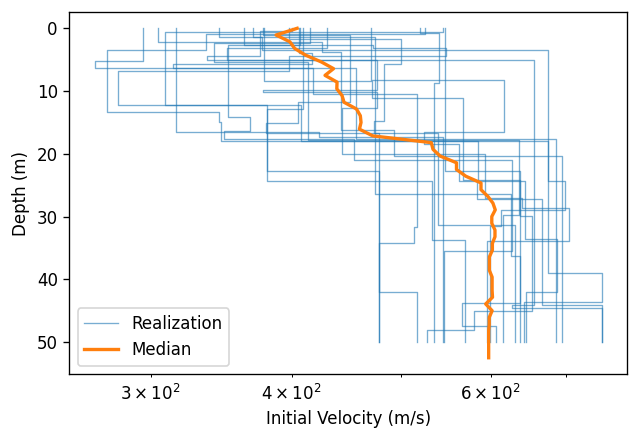

In [21]:
ax = outputs[-1].plot(style="stats")

In [22]:
outputs[-1].calc_stats(as_dataframe=True)

,median,ln_std
depth,,
0.000000,404.435046,0.177878
1.071429,387.419279,0.170288
2.142857,398.447281,0.180899
3.214286,402.415618,0.190450
4.285714,411.530257,0.234380
5.357143,424.861404,0.248965
6.428571,435.588518,0.224538
7.500000,428.081075,0.243552
8.571429,438.711700,0.254147
